In [67]:
# generating input and output
import numpy as np
np.random.seed(42)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)


In [68]:
#fitting parameters using normal equations
x=np.c_[np.ones((100,1)),x]
a=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
x




array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [69]:
#checking out the coefficients
print(a)



[[4.21509616]
 [2.77011339]]


In [70]:
#using the coeeficients to predict values
x_test=np.array([[0],[5]])
print(x_test)
x_test=np.c_[np.ones((2,1)),x_test]
prediction=x_test.dot(a)
prediction

[[0]
 [5]]


array([[ 4.21509616],
       [18.06566309]])

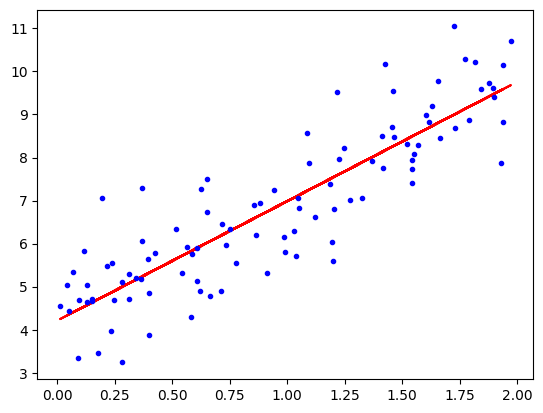

In [71]:
#plotting predictions
from matplotlib import pyplot as plt
plt.plot(x[:,1],x.dot(a),"r-")
plt.plot(x[:,1],y,"b .")
plt.show()

In [72]:
#Linear regression using sklearn
from sklearn.linear_model import LinearRegression
x=x.reshape(100,2)
y=y.reshape(100,1)
lin=LinearRegression()
lin.fit(x,y)
print(f" The intercept is:{lin.intercept_}")
# print(f" The coefficient is:{lin.coef_[:,1]}")
print(f" The coefficient is:{lin.coef_[:1]}")

 The intercept is:[4.21509616]
 The coefficient is:[[0.         2.77011339]]


In [73]:
#Using Gradient Descent to compute Theeta
eta=0.38
itr=1000
m=100
initial_t=np.random.randn(2,1)

for i in range(itr):
    gradient=2/m*x.T.dot(x.dot(initial_t)-y)
    initial_t=initial_t-eta*gradient

initial_t

array([[4.21509616],
       [2.77011339]])

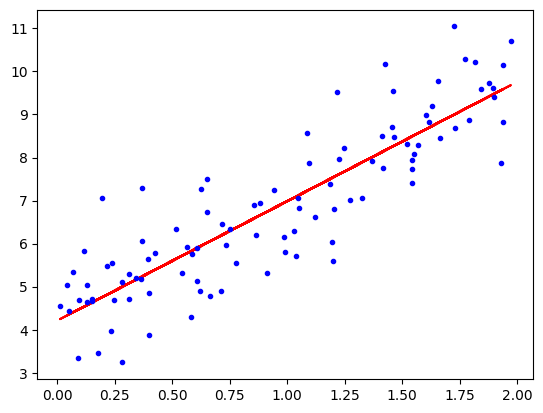

In [74]:
#plotting the gd line 
plt.plot(x[:,1],x.dot(initial_t),"r-")
plt.plot(x[:,1],y,"b.")
plt.show()

In [75]:
#using SGD
epc=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t1+t)

theeta=np.random.randn(2,1)
m=x.shape[0]

for i in range(epc):
    for i in range (m):
        inst=np.random.randint(m)
        xi=x[inst:inst+1]
        yi=y[inst:inst+1]
        grd=2*xi.T.dot(xi.dot(theeta)-yi)
        eta=learning_schedule(epc*m+i)
        theeta=theeta-eta*grd


In [76]:
print(theeta)

[[3.70614498]
 [3.16501338]]


In [77]:
#polynomial regression:
#generating the data set:

n=200
x=3*np.random.rand(n,1)-3
y=11*x**2+x+2+np.random.randn(n,1)  #SOURCE 


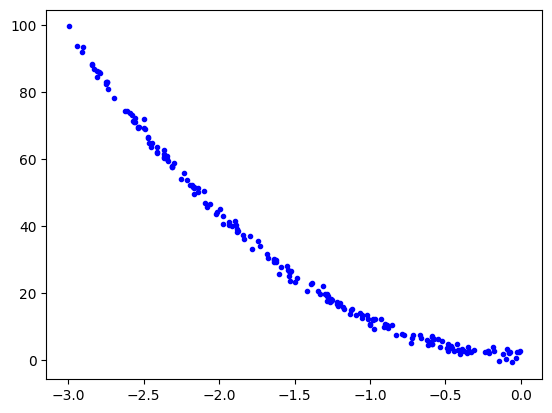

In [78]:
plt.plot(x,y,"b.")
plt.show()

In [ ]:
#adding additional powers and fitting a regression model
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False) #Adding the X^2 term
x_mod=poly_features.fit_transform(x)


x_mod.shape

l_reg=LinearRegression()
l_reg.fit(x_mod,y)
print(f"the intercept is{l_reg.intercept_} and the coefficients are {l_reg.coef_}")


the intercept is[2.00132009] and the coefficients are [[ 1.24934011 11.09208653]]


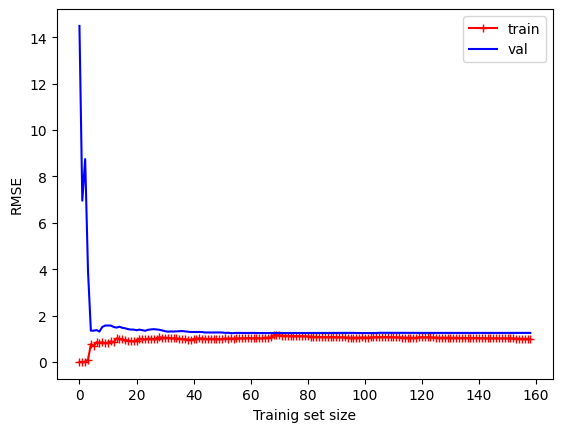

In [86]:
# plotting the learning curve

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_mod,y,test_size=0.2)
train_errors,val_errors=[],[]
for m in range(1,len(x_train)):
    lin=l_reg.fit(x_train[:m],y_train[:m])
    y_train_pred=lin.predict(x_train[:m])
    y_val_pred=lin.predict(x_val[:m])
    train_errors.append(mean_squared_error(y_train[:m],y_train_pred))
    val_errors.append(mean_squared_error(y_val[:m],y_val_pred))

plt.plot(np.sqrt(train_errors),"r-+",label="train")
plt.plot(np.sqrt(val_errors),"b-",label="val")
plt.ylabel("RMSE")
plt.xlabel("Trainig set size")
plt.legend()
plt.show()

